In [6]:
import pygad
import numpy
import math

In [7]:
# 0 - wall, 1 - empty path, 2 - start, 3 - exit
labyrinth = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
             [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
             [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
             [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
             [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0 ,0],
             [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
             [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
             [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [8]:
# 0 - down, 1 - up, 2 - left, 3 - right
gene_space = [0, 1, 2, 3]

def check_collision(row, col):
    if row > 11 or col > 11 or row < 0 or col < 0:
        return True
    if labyrinth[row][col] == 0:
       return True
    return False 

def fitness_func(solution, solution_idx):
    move_counter = 0
    end_row, end_col = 10, 10
    row, column = 1, 1
    
    for i in solution:
        if row == end_row and column == end_col:
            return 0
        match i:
            case 0:
                if not check_collision(row + 1, column):
                    row += 1
            case 1:
                if not check_collision(row - 1, column):
                    row -= 1
            case 2:
                if not check_collision(row, column - 1):
                    column -= 1
            case 3:
                if not check_collision(row, column + 1):
                    column += 1
    return (abs(end_col - column) + abs(end_row - row)) * -1

fitness_function = fitness_func

In [9]:
sol_per_pop = 20
num_genes = 30

# ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
# ile pokolen
# ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 100
keep_parents = 2

# jaki typ selekcji rodzicow?
# sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

# w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

# mutacja ma dzialac na ilu procent genow?
# trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

Parameters of the best solution : [2. 3. 3. 0. 3. 3. 1. 3. 3. 0. 0. 0. 2. 2. 0. 3. 0. 2. 3. 0. 3. 0. 2. 3.
 0. 3. 0. 3. 0. 0.]
Fitness value of the best solution = 0


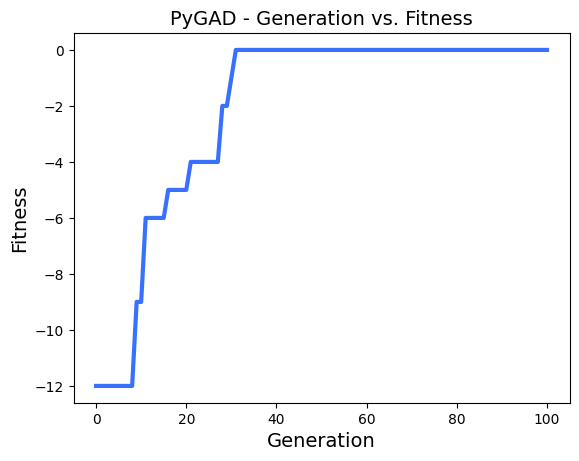

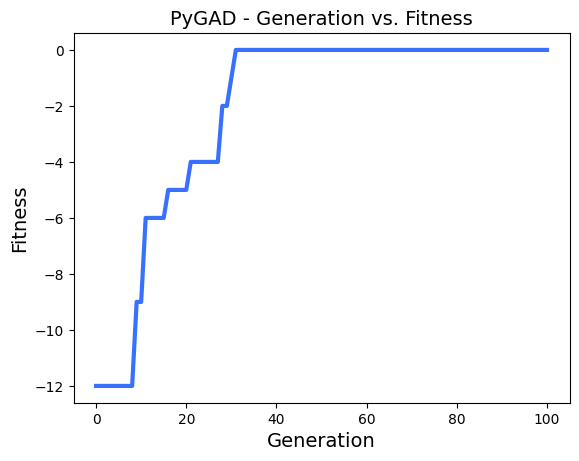

In [10]:
# inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

# uruchomienie algorytmu
ga_instance.run()

# podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

# wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()